# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot, gaussian_kde
from statsmodels.tsa.stattools import pacf
import yfinance as yf
import pandas_datareader as pdr
from scipy.stats import skew, kurtosis, jarque_bera, normaltest, kstest, norm

# Loading data and calculating log price and the differentiated log price

In [2]:
apple_data = pd.read_excel('Data.xlsx', sheet_name='DatiD')

In [3]:
apple_data.head()

,Date,APPLE,SP100,APPLEu
0,1984-12-31,101.30,82.54,101.3
1,1985-01-01,101.30,82.54,101.3
2,1985-01-02,96.96,81.53,97.0
3,1985-01-03,98.70,80.96,98.7
4,1985-01-04,98.70,80.50,98.7


In [4]:
apple_data['LogPrice'] = np.log(apple_data['APPLE'])
apple_data['DiffLogPrice'] = apple_data['LogPrice'].diff().dropna()

In [5]:
apple_data.head()

,Date,APPLE,SP100,APPLEu,LogPrice,DiffLogPrice
0,1984-12-31,101.30,82.54,101.3,4.618086,NaN
1,1985-01-01,101.30,82.54,101.3,4.618086,0.000000
2,1985-01-02,96.96,81.53,97.0,4.574299,-0.043788
3,1985-01-03,98.70,80.96,98.7,4.592085,0.017786
4,1985-01-04,98.70,80.50,98.7,4.592085,0.000000


# Time Series Plots for Apple data

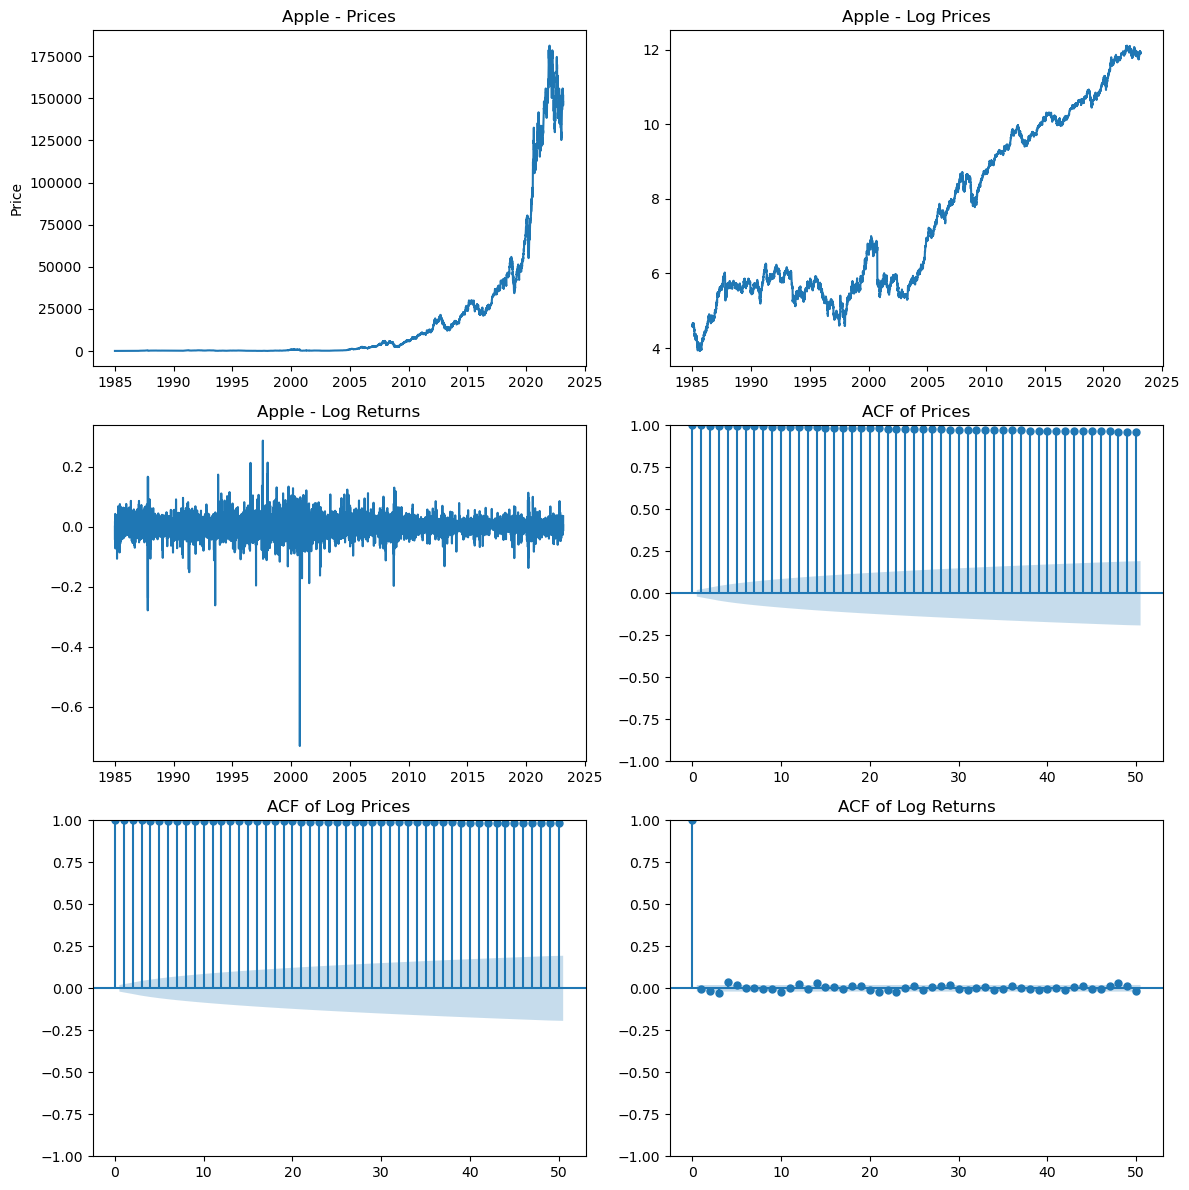

In [6]:
plt.figure(figsize=(12, 12))
# First subplot: Regular Prices
plt.subplot(3, 2, 1)  # Position the plot in the first slot of a 3x2 grid
plt.plot(apple_data['Date'], apple_data['APPLE'])  # Plot regular prices against dates
plt.title('Apple - Prices')  # Title for this subplot
plt.ylabel('Price')  # Y-axis label

# Second subplot: Logarithmic Prices
plt.subplot(3, 2, 2)  # Second slot in the grid
plt.plot(apple_data['Date'], apple_data['LogPrice'])  # Plot log prices
plt.title('Apple - Log Prices')  # Title for the log prices plot

# Third subplot: Logarithmic Returns
plt.subplot(3, 2, 3)  # Third slot in the grid
plt.plot(apple_data['Date'][1:], apple_data['DiffLogPrice'][1:])  # Plot log returns
plt.title('Apple - Log Returns')  # Title for the log returns plot

# Fourth subplot: Autocorrelation of Regular Prices
plt.subplot(3, 2, 4)  # Fourth slot in the grid
plot_acf(apple_data['APPLE'], lags=50, ax=plt.gca())  # ACF plot for regular prices
plt.title('ACF of Prices')  # Title for the ACF of prices plot

# Fifth subplot: Autocorrelation of Logarithmic Prices
plt.subplot(3, 2, 5)  # Fifth slot in the grid
plot_acf(apple_data['LogPrice'], lags=50, ax=plt.gca())  # ACF plot for log prices
plt.title('ACF of Log Prices')  # Title for the ACF of log prices plot

# Sixth subplot: Autocorrelation of Logarithmic Returns
plt.subplot(3, 2, 6)  # Last slot in the grid
plot_acf(apple_data['DiffLogPrice'].dropna(), lags=50, ax=plt.gca())  # ACF plot for log returns
plt.title('ACF of Log Returns')  # Title for the ACF of log returns plot

plt.tight_layout()
plt.show()

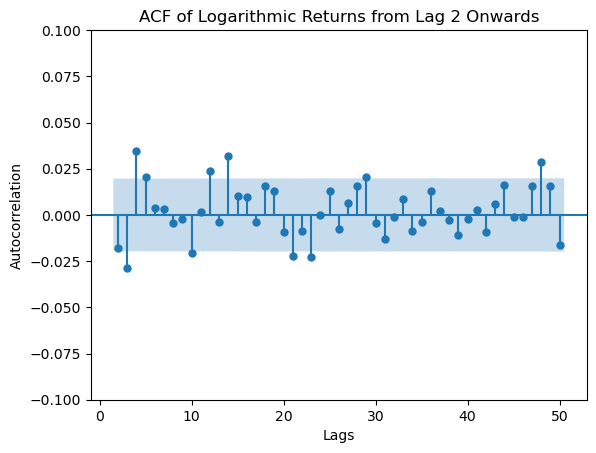

In [7]:
plot_acf(apple_data['DiffLogPrice'].dropna(), lags=np.arange(2, 51), ax=plt.gca())
plt.ylim(-0.1, 0.1)  
plt.title('ACF of Logarithmic Returns from Lag 2 Onwards')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In financial time series analysis, the Autocorrelation Function (ACF) is crucial for examining stock data characteristics. For regular stock prices, the ACF often shows a gradual decay, indicating a trend-following behavior and non-stationarity, typical in financial series, hinting at time-dependent factors like trends. In contrast, for logarithmic returns, a low ACF, especially at higher lags, is expected in efficient markets, adhering to the Efficient Market Hypothesis that past returns don't predict future ones. However, noticeable autocorrelation in returns might suggest market inefficiency and the potential for exploitable patterns.

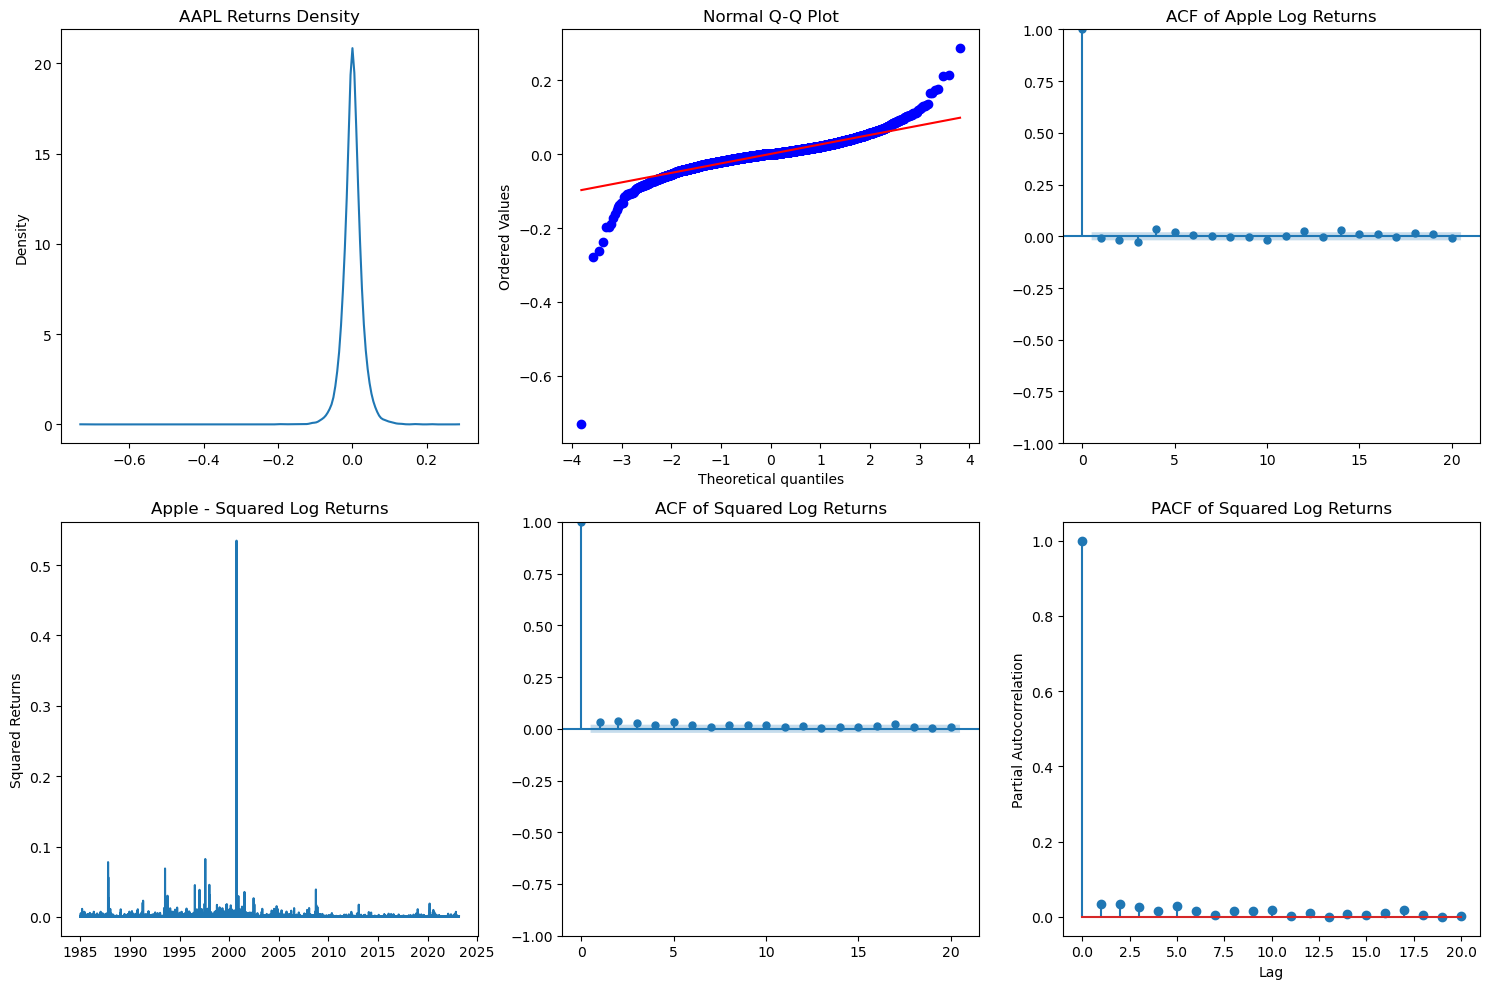

In [8]:
# Preparing data for plots
dlP = apple_data['DiffLogPrice'][1:]  # Excluding first NaN value
density = gaussian_kde(dlP)  # Kernel Density Estimation for log returns
xs = np.linspace(min(dlP), max(dlP), 200)  # Range for density plot
density.covariance_factor = lambda: .25  # Setting bandwidth for KDE
density._compute_covariance()
dlP2 = dlP ** 2  # Squared Log Returns for further analysis
dlP2_pacf = pacf(dlP2, nlags=20)  # Partial Autocorrelation for squared log returns

# Creating the figure for subplots
plt.figure(figsize=(15, 10))

# Density Plot of Log Returns
plt.subplot(2, 3, 1)
plt.plot(xs, density(xs))
plt.title('AAPL Returns Density')
plt.ylabel('Density')

# Q-Q Plot of Log Returns
plt.subplot(2, 3, 2)
probplot(dlP, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')

# ACF Plot for Log Returns
plt.subplot(2, 3, 3)
plot_acf(dlP, lags=20, ax=plt.gca())
plt.title('ACF of Apple Log Returns')

# Time Series Plot of Squared Log Returns
plt.subplot(2, 3, 4)
plt.plot(apple_data['Date'][1:], dlP2)
plt.title('Apple - Squared Log Returns')
plt.ylabel('Squared Returns')

# ACF for Squared Log Returns
plt.subplot(2, 3, 5)
plot_acf(dlP2, lags=20, ax=plt.gca())
plt.title('ACF of Squared Log Returns')

# PACF for Squared Log Returns
plt.subplot(2, 3, 6)
plt.stem(range(len(dlP2_pacf)), dlP2_pacf)
plt.title('PACF of Squared Log Returns')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

# Importing from Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


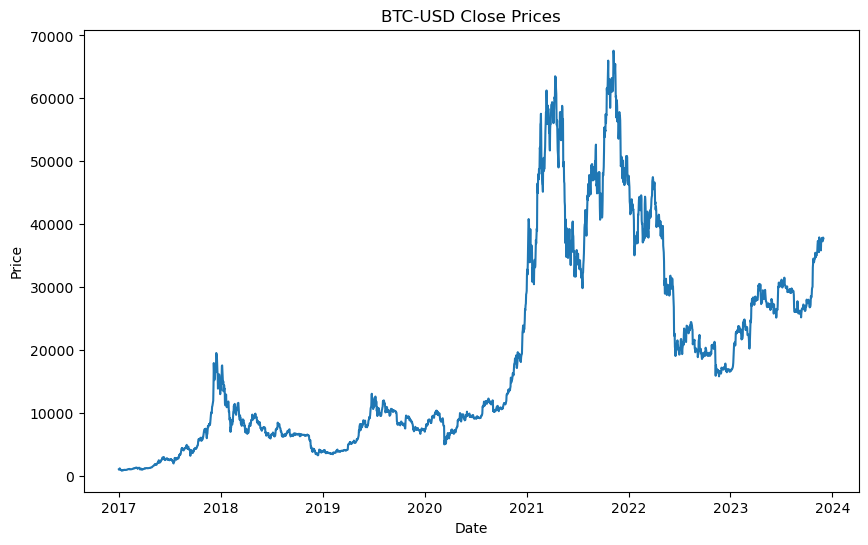

In [9]:
# Fetching stock data from Yahoo Finance
btc_usd = yf.download('BTC-USD', start='2017-01-01', end='2023-12-01')

# Cleaning up the Bitcoin data to remove NaN values
btc_close = btc_usd['Close'].dropna()

# Plotting the Bitcoin data
plt.figure(figsize=(10, 6))
plt.plot(btc_close)
plt.title('BTC-USD Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Data on STOXX50

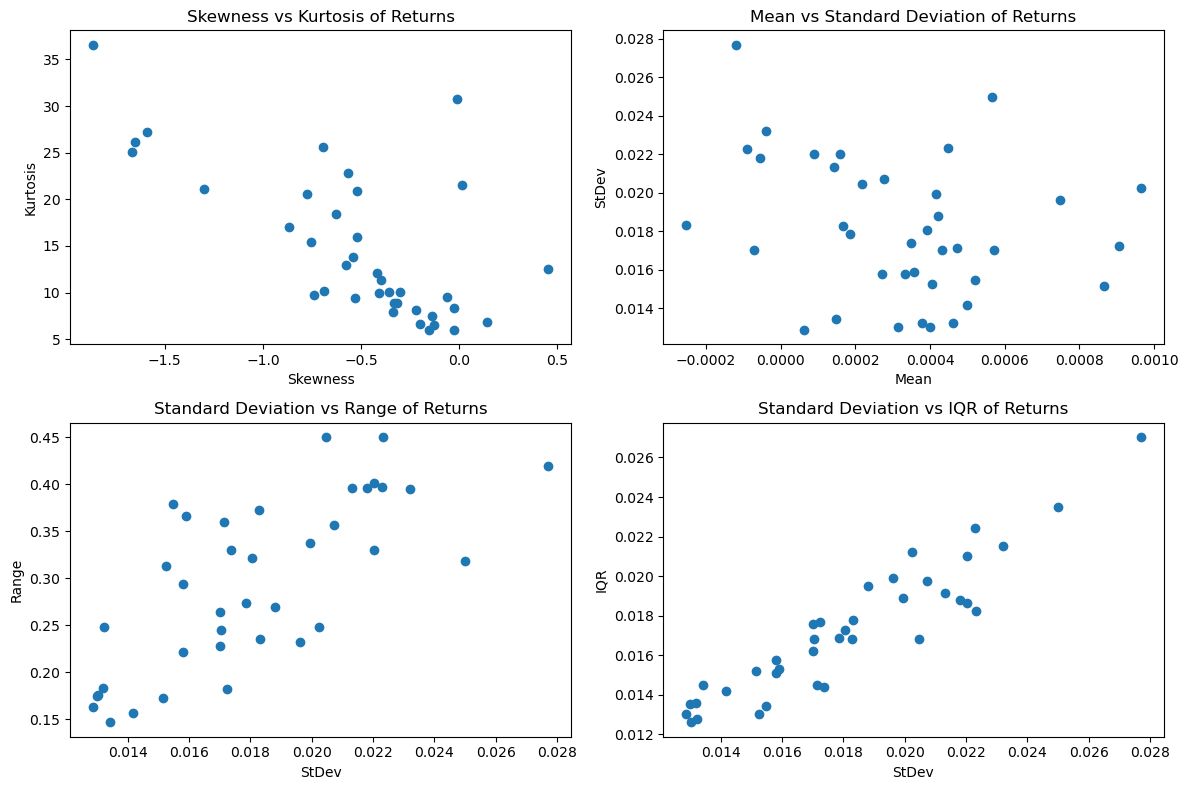

In [10]:
# Load the data
datiG = pd.read_excel("Data.xlsx", sheet_name="STOXX50")

# Dimensions of the data
N = datiG.shape[1]
T = datiG.shape[0]

# Logarithmic transformation and return calculation
p = np.log(datiG.iloc[:, 1:N])
r = p.iloc[1:T, :].values - p.iloc[:T-1, :].values
T, N = r.shape

# Exclude the second column
r = np.delete(r, 1, axis=1)
N = r.shape[1]

# Evaluate the last 2000 observations
r = r[-2000:, :]
T, N = r.shape

# Basic Stats
mean_r = np.mean(r, axis=0)
std_r = np.std(r, axis=0)
skew_r = skew(r, axis=0)
kurt_r = kurtosis(r, axis=0, fisher=False)

# Scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot of Skewness vs Kurtosis
plt.subplot(2, 2, 1)
plt.scatter(skew_r, kurt_r)
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.title('Skewness vs Kurtosis of Returns')

# Scatter plot of Mean vs Standard Deviation
plt.subplot(2, 2, 2)
plt.scatter(mean_r, std_r)
plt.xlabel('Mean')
plt.ylabel('StDev')
plt.title('Mean vs Standard Deviation of Returns')

# Scatter plot of Standard Deviation vs Range (Max-Min)
plt.subplot(2, 2, 3)
plt.scatter(std_r, np.max(r, axis=0) - np.min(r, axis=0))
plt.xlabel('StDev')
plt.ylabel('Range')
plt.title('Standard Deviation vs Range of Returns')

# Scatter plot of Standard Deviation vs Inter-Quartile Range (IQR)
plt.subplot(2, 2, 4)
plt.scatter(std_r, np.percentile(r, 75, axis=0) - np.percentile(r, 25, axis=0))
plt.xlabel('StDev')
plt.ylabel('IQR')
plt.title('Standard Deviation vs IQR of Returns')

plt.tight_layout()
plt.show()

This script calculates skewness and kurtosis for financial returns data across various group sizes. It starts by initializing arrays to store these statistics and sets the first row with overall skewness and kurtosis. For each group size, the script aggregates data using a block diagonal matrix and matrix multiplication. Skewness and kurtosis are computed for these aggregates and stored in arrays. The results are then organized into Pandas DataFrames for easy analysis.

In [11]:
T, N = r.shape

# Initialize arrays for skewness and kurtosis
SK = np.zeros((22, N))
KU = np.zeros((22, N))
SK[0]=skew_r
KU[0]=kurt_r
# Iterate over the range 2 to 22
for g in range(2, 23):
    Tog = T // g
    That = Tog * g
    r1 = r[:That, :]

    # Create a matrix Tg that is a block diagonal matrix of 1's of size Tog
    Tg = np.kron(np.eye(Tog), np.ones(g))

    # Perform matrix multiplication
    rg = Tg @ r1

    # Calculate skewness and kurtosis for each column
    SK[g - 1, :] = skew(rg, axis=0)
    KU[g - 1, :] = kurtosis(rg, axis=0, fisher=False)
# Convert results to Pandas DataFrame for easier handling (optional)
SK_df = pd.DataFrame(SK, columns=[f'Column_{i+1}' for i in range(N)])
KU_df = pd.DataFrame(KU, columns=[f'Column_{i+1}' for i in range(N)])

# The resulting DataFrames SK_df and KU_df contain the skewness and kurtosis values

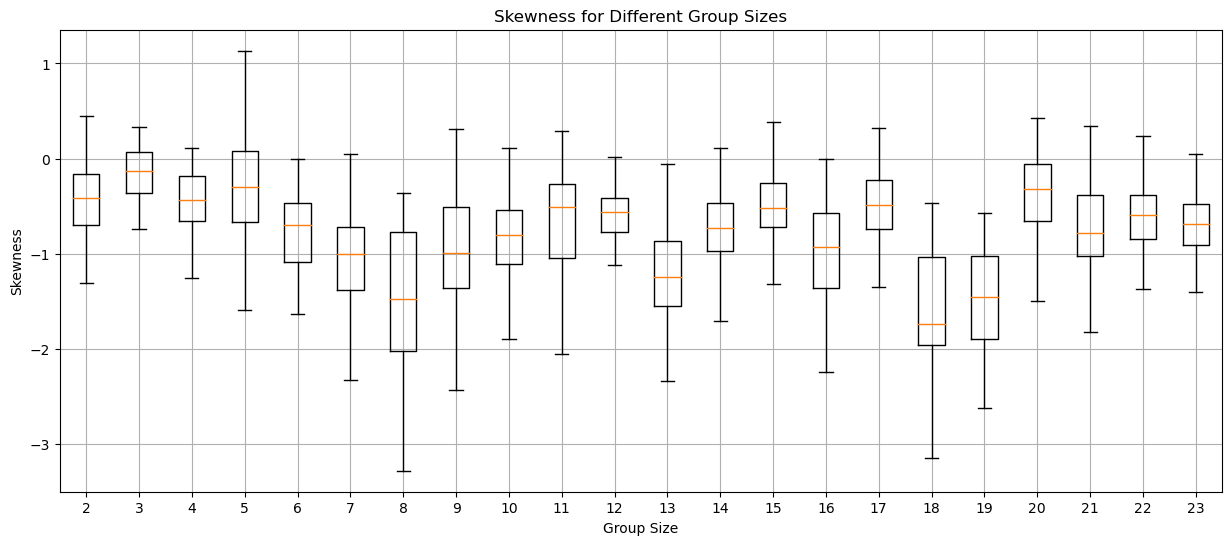

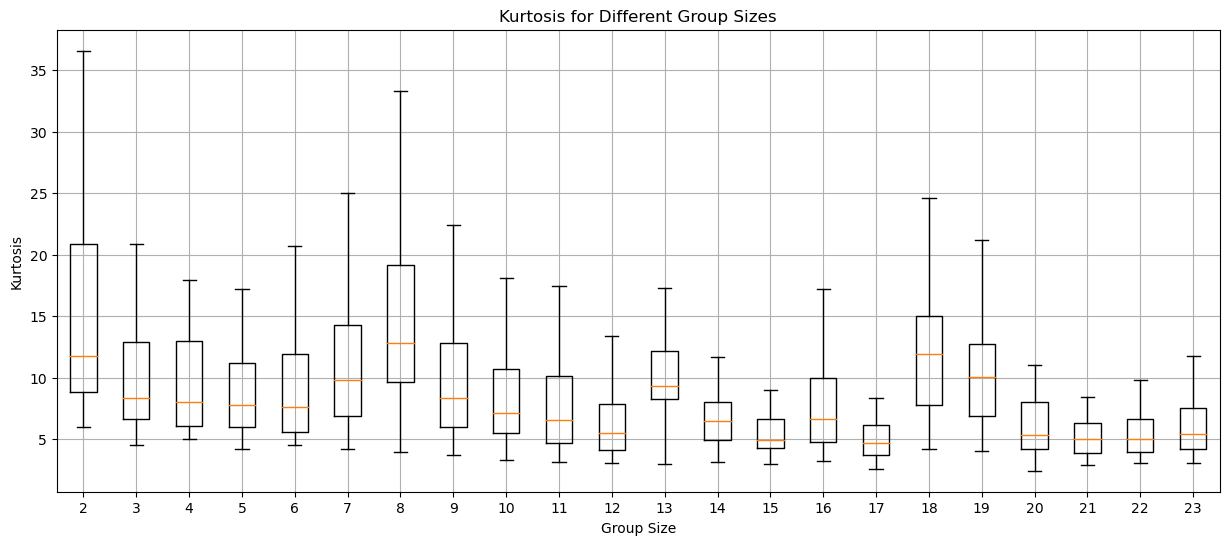

In [12]:
# Boxplots for Skewness for each group size
plt.figure(figsize=(15, 6))
plt.boxplot(SK.T, showfliers=False)
plt.title('Skewness for Different Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Skewness')
plt.xticks(ticks=range(1, 23), labels=[f'{i+2}' for i in range(22)])
plt.grid(True)
plt.show()

# Boxplots for Kurtosis for each group size
plt.figure(figsize=(15, 6))
plt.boxplot(KU.T, showfliers=False)
plt.title('Kurtosis for Different Group Sizes')
plt.xlabel('Group Size')
plt.ylabel('Kurtosis')
plt.xticks(ticks=range(1, 23), labels=[f'{i+2}' for i in range(22)])
plt.grid(True)
plt.show()


This script conducts normality tests on time-series financial returns data. For each group size 'g', the data is aggregated using a matrix multiplication approach, akin to block summation. The script then applies three normality tests: Jarque-Bera, D'Agostino's K-squared, and Kolmogorov-Smirnov, to each variable in the dataset. Results, including test statistics and p-values, are stored in matrices. Finally, it visualizes these statistics using boxplots, providing a comparative view across different group sizes.

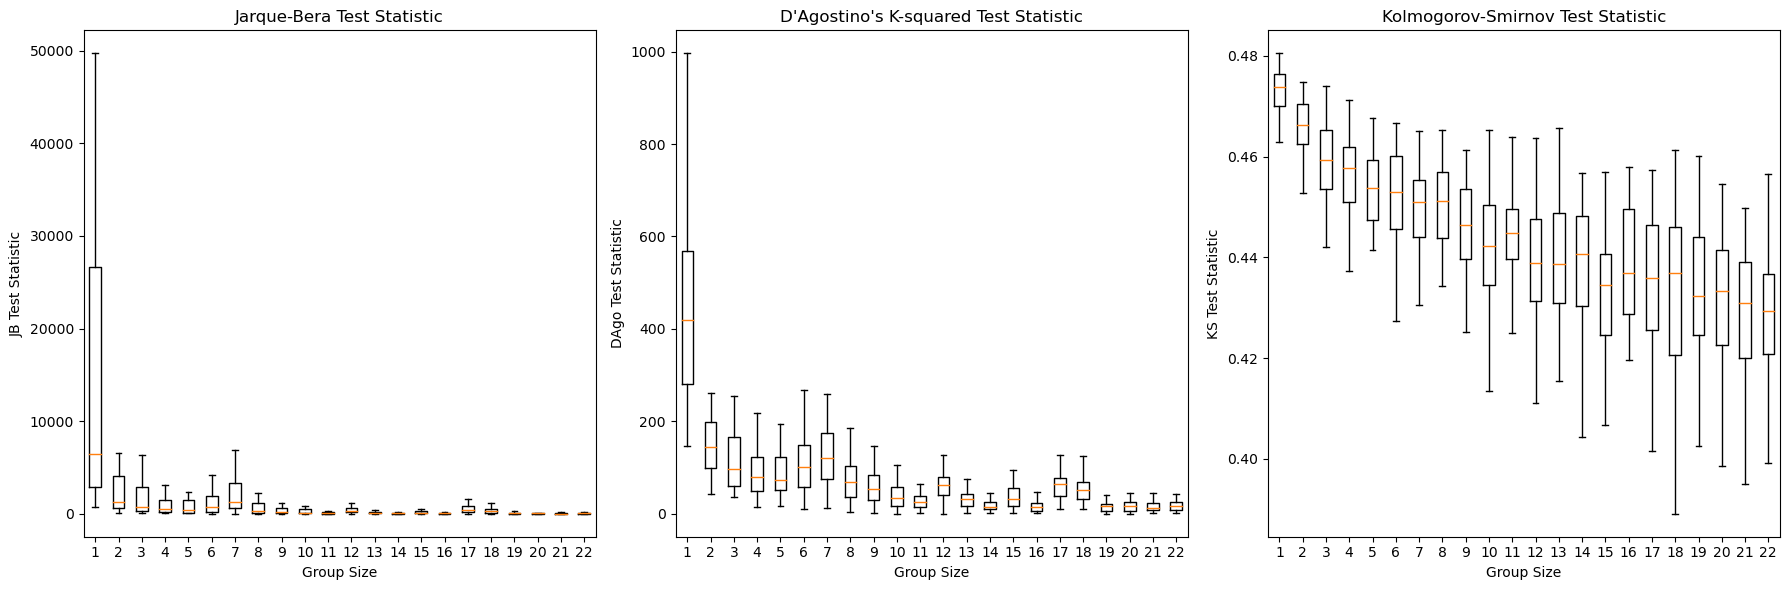

In [13]:
T, N = r.shape

# Initialize matrices for test statistics and p-values
JBt = np.zeros((22, N))
JBp = np.zeros((22, N))
DAt = np.zeros((22, N))
DAp = np.zeros((22, N))
KSt = np.zeros((22, N))
KSp = np.zeros((22, N))

# Iterate for each group size g
for g in range(1, 23):
    Tog = max(1, T // g)
    That = Tog * g
    r1 = r[:That, :]
    
    # Create a matrix Tg and perform matrix multiplication
    Tg = np.kron(np.eye(Tog), np.ones((1, g)))
    rg = Tg @ r1

    # Perform normality tests for each column
    for i in range(N):
        # Jarque-Bera test
        JB_result = jarque_bera(rg[:, i])
        JBt[g-1, i] = JB_result.statistic
        JBp[g-1, i] = JB_result.pvalue

        # D'Agostino's K-squared test
        DA_result = normaltest(rg[:, i])
        DAt[g-1, i] = DA_result.statistic
        DAp[g-1, i] = DA_result.pvalue

        # Kolmogorov-Smirnov test
        KS_result = kstest(rg[:, i], 'norm')
        KSt[g-1, i] = KS_result.statistic
        KSp[g-1, i] = KS_result.pvalue

# Plotting the results
plt.figure(figsize=(18, 6))

# Jarque-Bera Test
plt.subplot(1, 3, 1)
plt.boxplot(JBt.T, showfliers=False)
plt.title('Jarque-Bera Test Statistic')
plt.xlabel('Group Size')
plt.ylabel('JB Test Statistic')

# D'Agostino's K-squared Test
plt.subplot(1, 3, 2)
plt.boxplot(DAt.T, showfliers=False)
plt.title("D'Agostino's K-squared Test Statistic")
plt.xlabel('Group Size')
plt.ylabel('DAgo Test Statistic')

# Kolmogorov-Smirnov Test
plt.subplot(1, 3, 3)
plt.boxplot(KSt.T, showfliers=False)
plt.title('Kolmogorov-Smirnov Test Statistic')
plt.xlabel('Group Size')
plt.ylabel('KS Test Statistic')

plt.tight_layout()
plt.show()